In [2]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


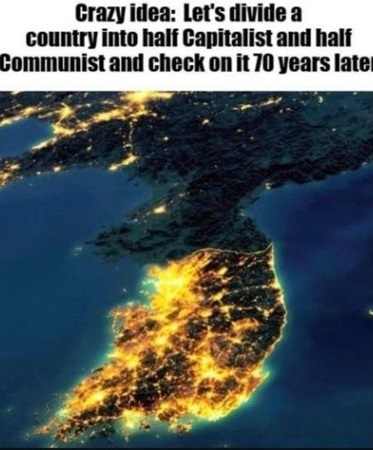

In [4]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/Images/korea.jpg'

origin_img = cv2.imread(img_path)

cv2_imshow(origin_img)

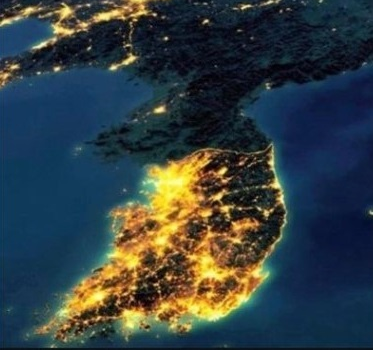

In [5]:
rows,cols = origin_img.shape[0:2]  # 영상의 크기

dx, dy = 0, -100           # 이동할 픽셀 거리

# 1. 변환 행렬 생성
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])
# 2. 단순 이동
dst = cv2.warpAffine(origin_img, mtrx, (cols+dx, rows+dy))
cv2_imshow(dst)

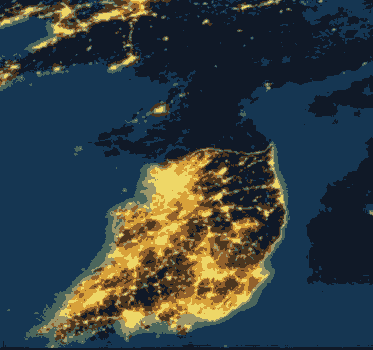

In [6]:
z = dst.reshape((-1, 3))
z = np.float32(z)

# k-means 에 대한 기준 및 플래그 정의
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

# k-means 의 k값 설정
K = [8]

# K 값을 반복하고 k-means 클러스터링을 적용.
for k in K:
    compact, labels, centers = cv2.kmeans(z, k, None, criteria, 10, flags)

    # centers 를 unit8로 변환
    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    res2 = res.reshape((dst.shape))

    cv2_imshow(res2)

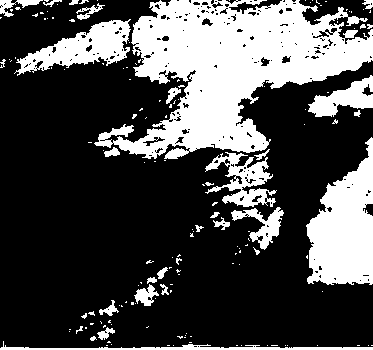

In [7]:
# BGR -> HSV 변환
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2HSV)

# 검은색 범위 설정 (H, S, V)
# 일반적으로 V 값이 낮고, S 값이 낮은 영역을 검은색으로 간주한다.
dst2 = cv2.inRange(res2, (0, 0, 0), (180, 255, 50))


cv2_imshow(dst2)

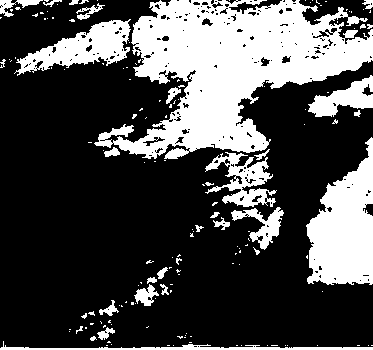

In [8]:
_, dst2_binary = cv2.threshold(dst2, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(dst2_binary)

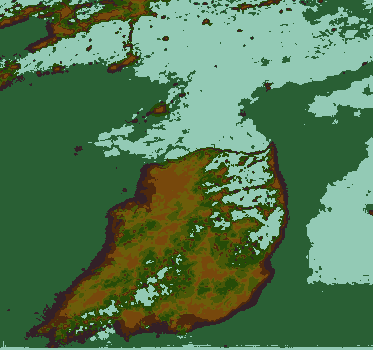

In [9]:
alpha = 0.5 # 합성에 사용할 알파 값

#합성에 사용할 영상 읽기
img1 = dst2_binary
img2 = res2

img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)

# 알파 블렌딩
alpha = 0.5
blended = img1 * alpha + img2 * (1 - alpha)
blended = blended.astype(np.uint8)  # 데이터 타입 변환

cv2_imshow(blended)

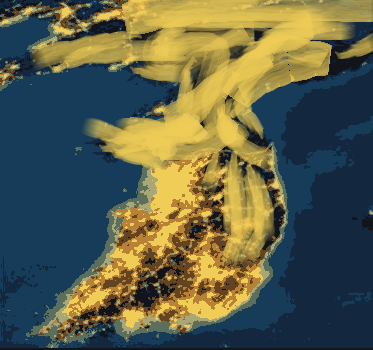

In [11]:
#원래 목표했던 이미지..
img_path2 = '/content/gdrive/MyDrive/Colab Notebooks/Images/korea222.png'

goal_img = cv2.imread(img_path2)

cv2_imshow(goal_img)
